In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_3719_.nc')
LAT = data.variables['lat']
LON = data.variables['lon']
PLOT = data.variables['PSL']

In [3]:
LAT.shape


(721,)

In [4]:
LON[:]

masked_array(data=[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02,
                   3.5950e+02, 3.5975e+02],
             mask=False,
       fill_value=1e+20)

In [5]:
LAT[200]

masked_array(data=-40.,
             mask=False,
       fill_value=1e+20)

In [6]:
PLOT.shape

(1, 721, 1440)

In [7]:
PLOT[0,100,:]

masked_array(data=[98164.74, 98169.26, 98173.89, ..., 98150.99, 98155.44,
                   98159.96],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
# 65 大气压

result1 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:160]
    plot65two = data.variables['PSL'][0,100,-180:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result1[i] = A
    i = i + 1

In [9]:
# 40 大气压

result2 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:160]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-180:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result2[i] = A
    i = i + 1

In [10]:
std = np.std(result1)
ave = np.nanmean(result1)
final65 = (result1 - ave)/std

In [11]:
ww65 = np.convolve(final65, np.ones((60,))/60, mode='valid')
mean65 = np.mean(ww65)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


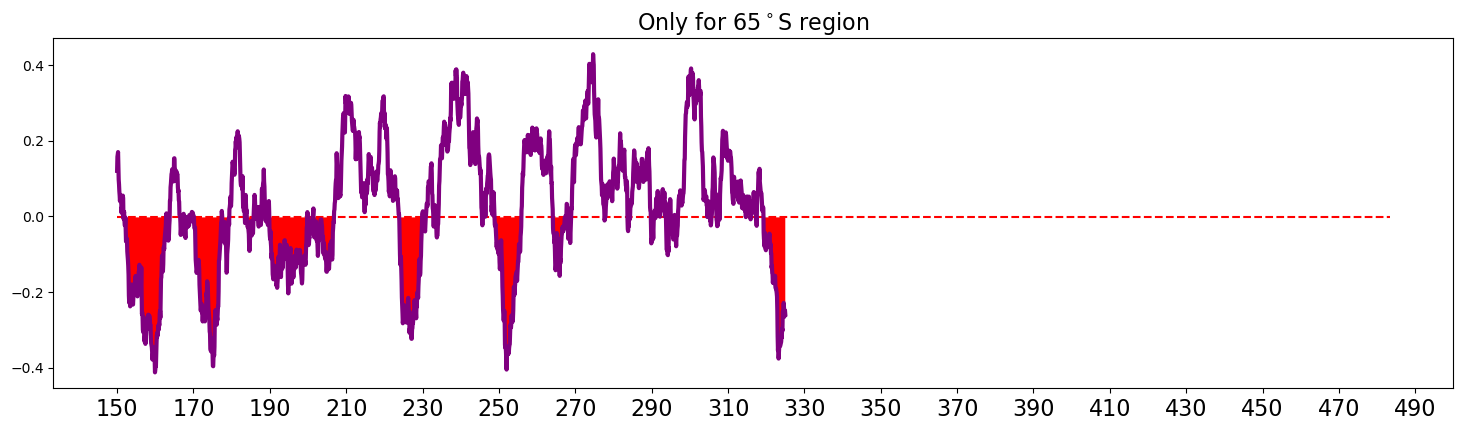

In [12]:
t = np.arange(0,2101,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
plt.hlines(mean65, 0, 4000, colors = "red",linestyles = "dashed")
ax0.plot(t,-ww65[1560:],'purple',linewidth=3)
ax0.fill_between(t,mean65,-ww65[1560:],where=-ww65[1560:] < 0,facecolor='red', alpha=1)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
ax0.set_title('Only for 65$^\circ$S region',**my_font)
plt.savefig("SAtry.png",bbox_inches='tight',dpi=fig.dpi)

In [13]:
std = np.std(result2)
ave = np.nanmean(result2)
final40 = (result2 - ave)/std

In [14]:
ddd = final65-final40

In [15]:
ddd2 = ddd[1560:]

In [16]:
ddd2.shape

(2160,)

In [17]:
b2= np.load(file="SAM500ddd.npy")
b1= np.load(file="SAM330-ddd.npy")

In [18]:
b22 = b2[:1944]

In [19]:
162*12

1944

In [20]:
xx1 = np.hstack((ddd2,b1))
xx2 = np.hstack((xx1,b22))

In [21]:
xx2.shape

(4200,)

In [22]:
4200/12

350.0

In [23]:
d4 = xx2.reshape(350,12)

In [24]:
dmean = np.nanmean(d4,axis=1)

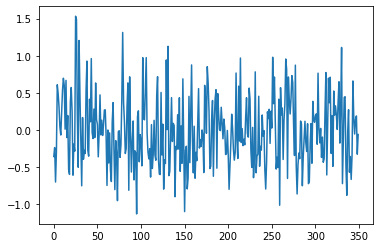

In [25]:
plt.plot(dmean)

In [26]:
ww2 = np.convolve(dmean, np.ones((5,))/5, mode='valid')
mean = np.mean(ww2)

In [27]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")
t = np.arange(2,348,1)

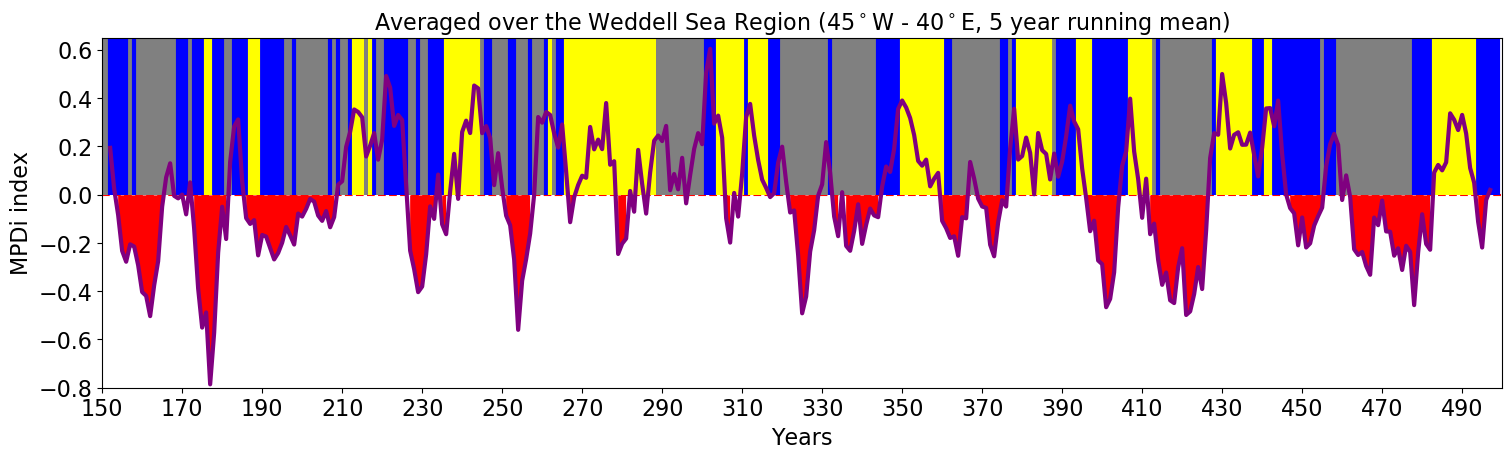

In [28]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 0, 0.65, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 0, 0.65, colors = "blue",linewidth=3)
plt.vlines(wspxx, 0, 0.65, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('MPDi index',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.8, 0.65),xlim=(0, 350))
ax0.set_title('Averaged over the Weddell Sea Region (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
plt.savefig("SAMnew5.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
WWW333%%%

In [37]:
np.savetxt('regional.out', -ww2)

In [29]:
std = np.std(ww2)
ave = np.nanmean(ww2)
final65 = (ww2 - ave)/std

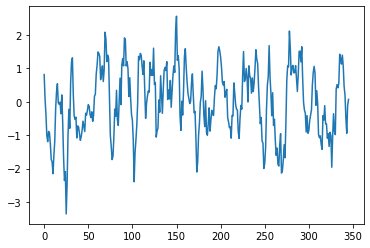

In [30]:
plt.plot(-final65)

Text(0.5, 1.0, 'Averaged over the Weddell Sea Region (45$^\\circ$W - 40$^\\circ$E, 5 year running mean)')

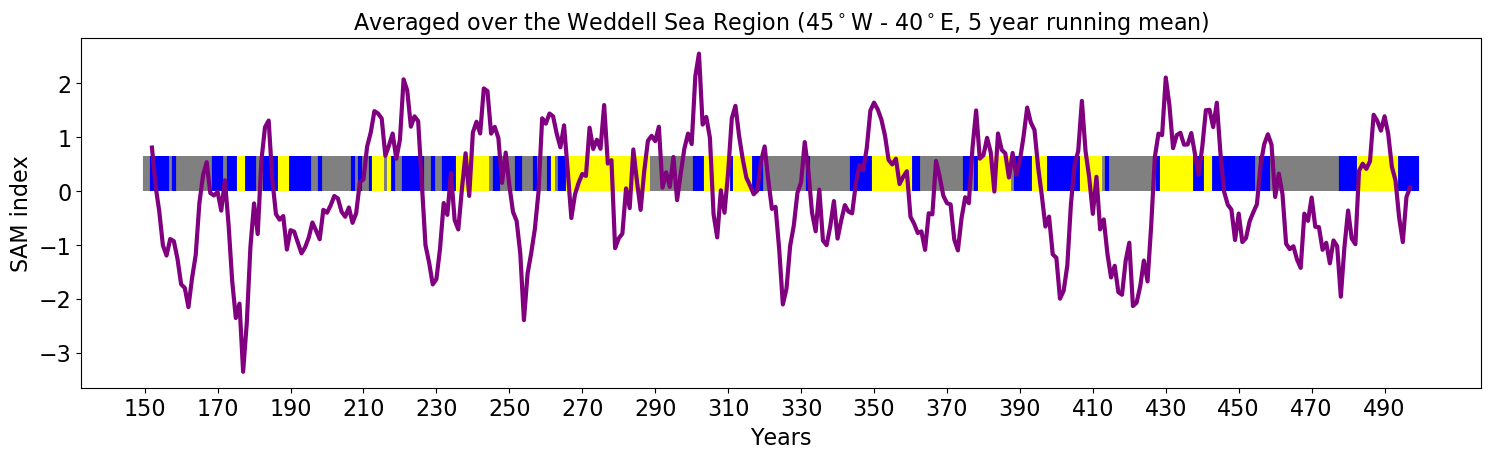

In [31]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-final65,'purple',linewidth=3)

#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxx, 0, 0.65, colors = "grey",linewidth=3)
plt.vlines(mrpxx, 0, 0.65, colors = "blue",linewidth=3)
plt.vlines(wspxx, 0, 0.65, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
#ax0.set(ylim=(-0.8, 0.65),xlim=(0, 350))
ax0.set_title('Averaged over the Weddell Sea Region (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)

In [16]:
ww2 = np.convolve(xx2, np.ones((60,))/60, mode='valid')
ave = np.nanmean(ww2)

In [17]:
ww2[1560:].shape

(4152,)

In [18]:
t = np.arange(0,4152,1)

In [19]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


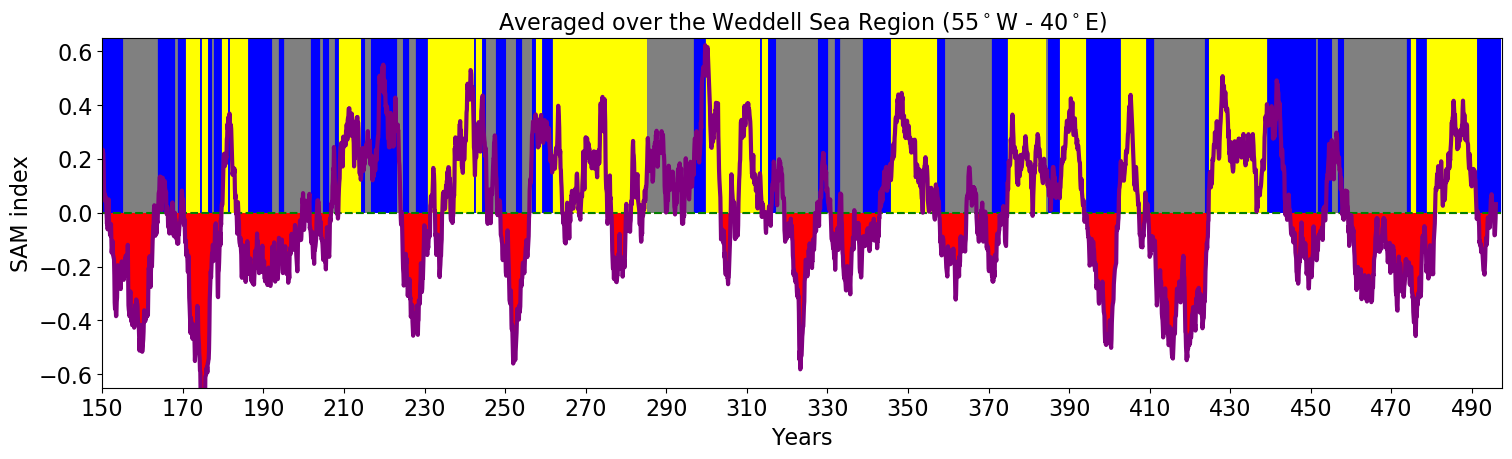

In [20]:
t = np.arange(0,4152,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-ww2[1560:],'purple',linewidth=3)
plt.hlines(ave, 0, 4200, colors = "red",linestyles = "dashed")
ax0.fill_between(t,ave,-ww2[1560:],where=-ww2[1560:] < 0,facecolor='red', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxxx, 0, 0.65, colors = "grey")
plt.vlines(mrpxxx, 0, 0.65, colors = "blue")
plt.vlines(xxx, 0, 0.65, colors = "yellow")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'black',**my_font)
plt.axis("tight")
plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.65, 0.65),xlim=(0, 4170))
ax0.set_title('Averaged over the Weddell Sea Region (55$^\circ$W - 40$^\circ$E)',**my_font)
plt.savefig("SAMnew1.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
ww2[1560:].shape

In [ ]:
cc= -ww2[1569::12]

In [ ]:
np.savetxt('lala.out',cc)

In [25]:
label='Weddell Sea Ice Concentration Normalized Value'

In [21]:
np.savetxt('SSAM.out',-ww2[1560:])

In [22]:
import waipy

In [23]:
data_norm = waipy.normalize(-ww2[1560:])#(maudmean)

In [24]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.99


In [26]:
result = waipy.cwt(data_norm, 1, pad = 1, dj = 0.25, s0 = 2, j1 = 3/0.25, lag1 = alpha, param = 6, mother='Morlet',name='ww')

4096 4096


In [29]:
time = np.arange(0, 4152) * 1 

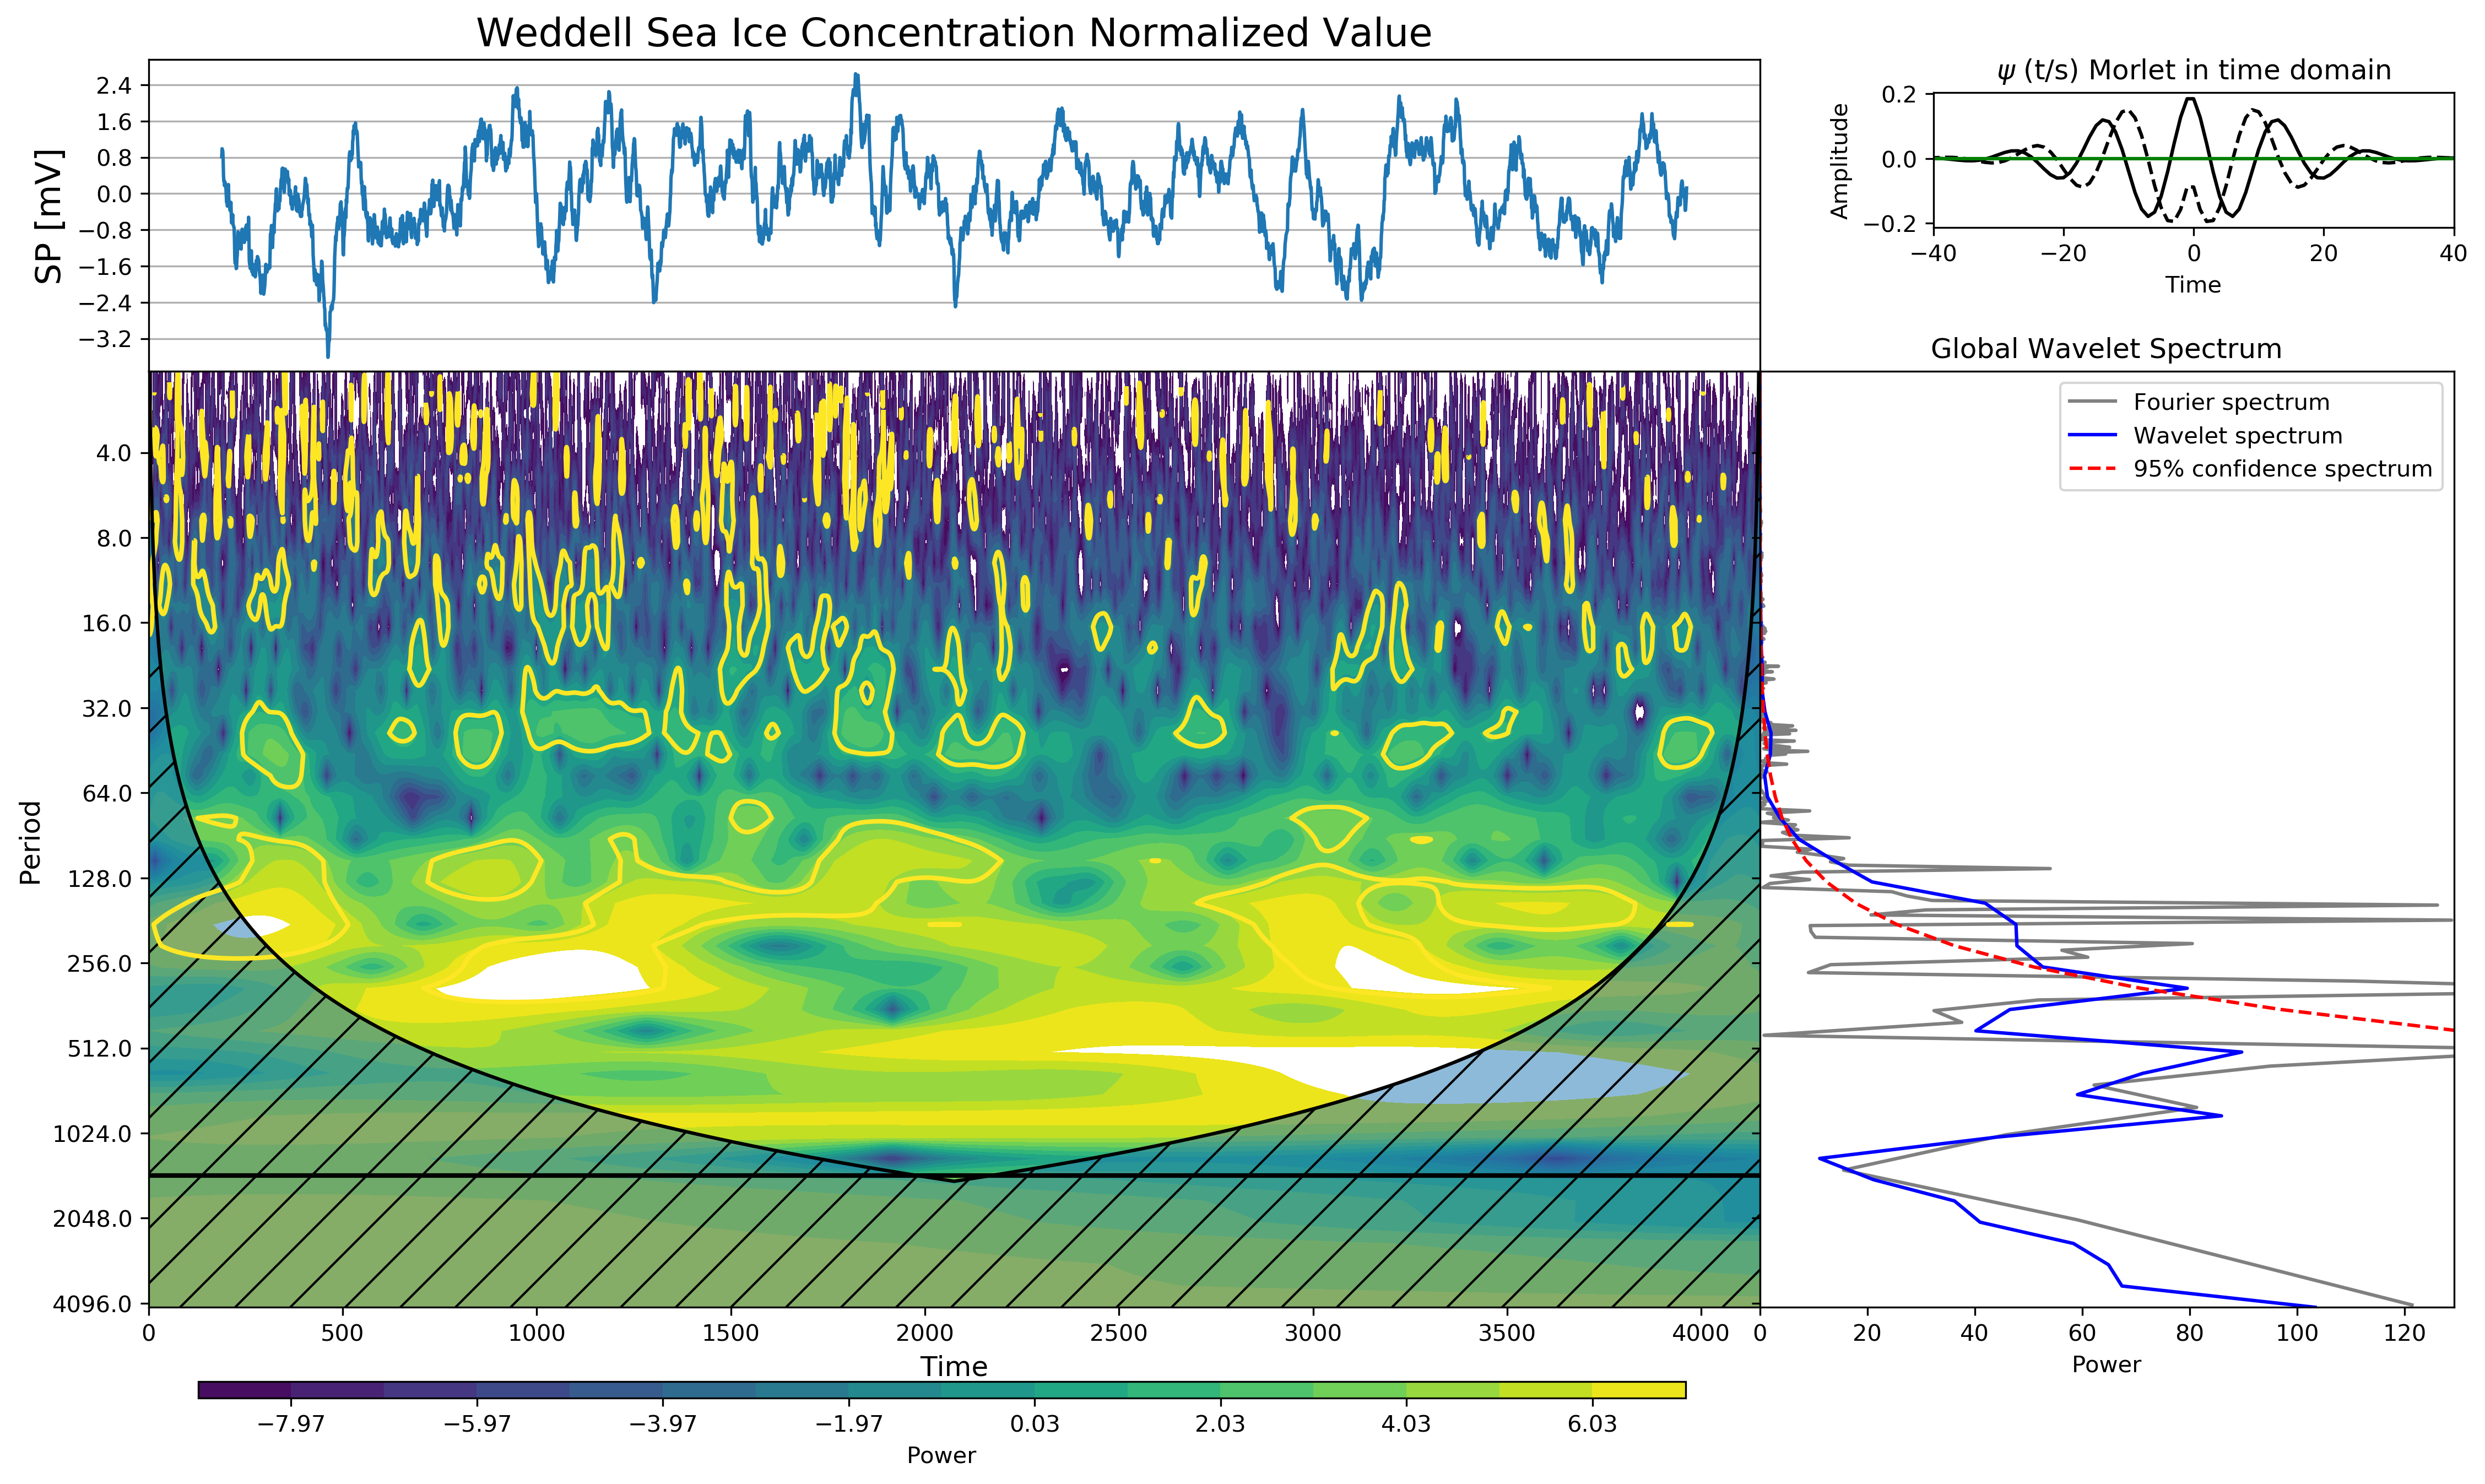

In [31]:
waipy.wavelet_plot(label, time, data_norm, 0.001, result);



plt.savefig("iSAM.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
ww2 = np.convolve(xx2, np.ones((60,))/60, mode='valid')
ave = np.nanmean(ww2)

In [ ]:
plt.plot(ww2)

In [ ]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ww2,'blue',linewidth=3)
plt.hlines(ave, 0, 5760, colors = "green",linestyles = "dashed")
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420'])
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'blue',**my_font)
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E)',**my_font)

In [ ]:
b= np.load(file="SAM500.npy")

In [ ]:
mid = np.zeros((120))
mid[mid == 0]=np.nan

In [ ]:
dd = np.hstack((ww2,mid))

In [ ]:
ddd = np.hstack((dd,b))

In [ ]:
ddd.shape

In [ ]:
plt.plot(ddd)

In [ ]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ddd,'blue',linewidth=3)
plt.hlines(ave, 0, 5760, colors = "green",linestyles = "dashed")
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420'])
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'blue',**my_font)
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E)',**my_font)

In [ ]:
#t = np.arange(36,3697,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=3)
plt.hlines(ave, 0, 5760, colors = "blue",linestyles = "dashed")
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,5760,600), ['20', '70', '120', '170','220','270','320','370','420','470'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'red',**my_font)
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E)',**my_font)
plt.savefig("SAM2.png",bbox_inches='tight',dpi=fig.dpi)


In [ ]:
#t = np.arange(36,3697,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(-ddd[1560:],'black',linewidth=3)
plt.hlines(ave, 0, 4200, colors = "blue",linestyles = "dashed")
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.vlines(noxxx, -0.65, 0.65, colors = "grey")
plt.vlines(mrpxxx, -0.65, 0.65, colors = "blue")
plt.vlines(xxx, -0.65, 0.65, colors = "yellow")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'black',**my_font)
plt.axis("tight")
plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.65, 0.65),xlim=(0, 4170))
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E)',**my_font)
plt.savefig("SAMnew.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36